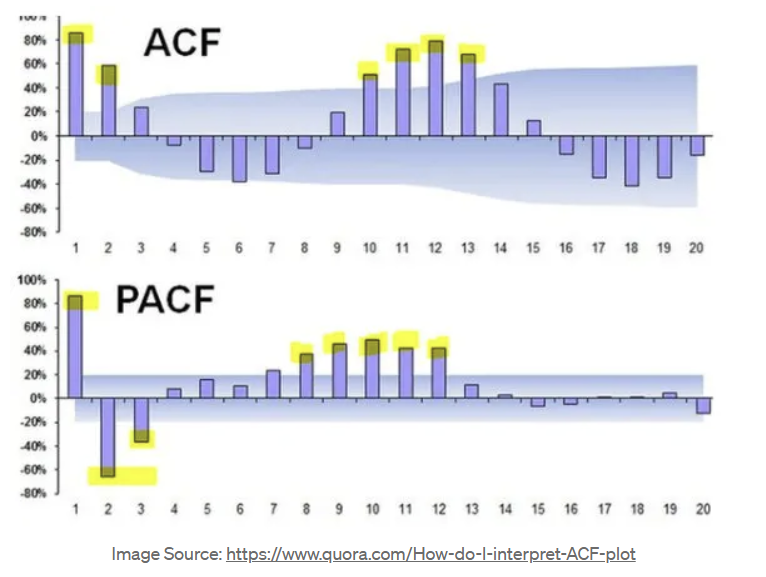

### To interpret ACF and PACF plots, we can look for the following patterns:

A sharp cutoff in the ACF plot at a particular lag suggests that a time series model with a corresponding number of lags would be a good fit.

A slowly decaying ACF plot may indicate the presence of a trend in the data.

A slowly decaying PACF plot may indicate the presence of seasonality in the data.

A sharp cutoff in the PACF plot at a particular lag may indicate the presence of a seasonal pattern in the data.


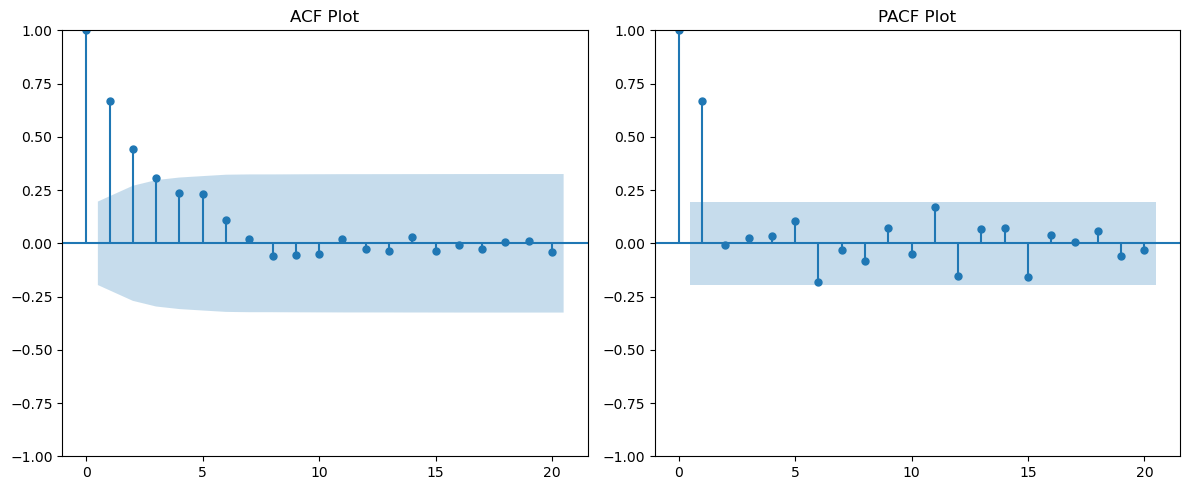

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create an AR(1) process for demonstration

# Set random seed so results are reproducible every time we run the code
np.random.seed(42)


n = 100
# Number of observations we want in our series
phi = 0.7

# AR(1) coefficient (phi), controls how strongly the past value influences the current value

noise = np.random.normal(0, 1, n)

# Generate 'n' random noise terms from a normal distribution (mean=0, std=1)
# This is the unpredictable part of the series


series_ar1 = [0]  # start value

# Start our series with the first value as 0
# In AR models, we need an initial starting point before we can calculate later values


# Loop from the 2nd observation to the nth


for t in range(1, n):
    series_ar1.append(phi * series_ar1[t-1] + noise[t])
    # AR(1) formula: X_t = phi * X_(t-1) + noise_t
    # Multiply the previous value by phi, then add a new noise term
    
# Convert the list to a Pandas Series for easier analysis and plotting

series_ar1 = pd.Series(series_ar1)







# Plot ACF and PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(series_ar1, lags=20, ax=plt.gca())  # plot_acf(series, lags=n) → plots autocorrelation for lags 1 to n.


plt.title("ACF Plot")

plt.subplot(1,2,2)
plot_pacf(series_ar1, lags=20, ax=plt.gca(), method='ywm') #plot_pacf(series, lags=n) → plots partial autocorrelation for lags 1 to n.

#method='ywm' → Yule-Walker method, stable for small samples.
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


### observation

For an AR(1) process:

PACF → Significant spike at Lag 1, then drops to near zero → suggests AR term p = 1.

ACF → Gradual exponential decay → typical for AR processes.

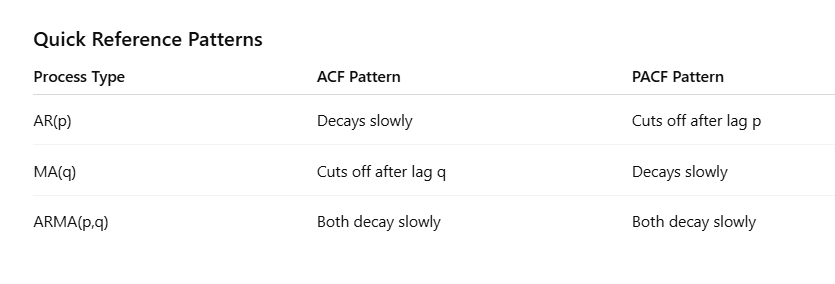

### Python Demo — MA(1) Example for Contrast

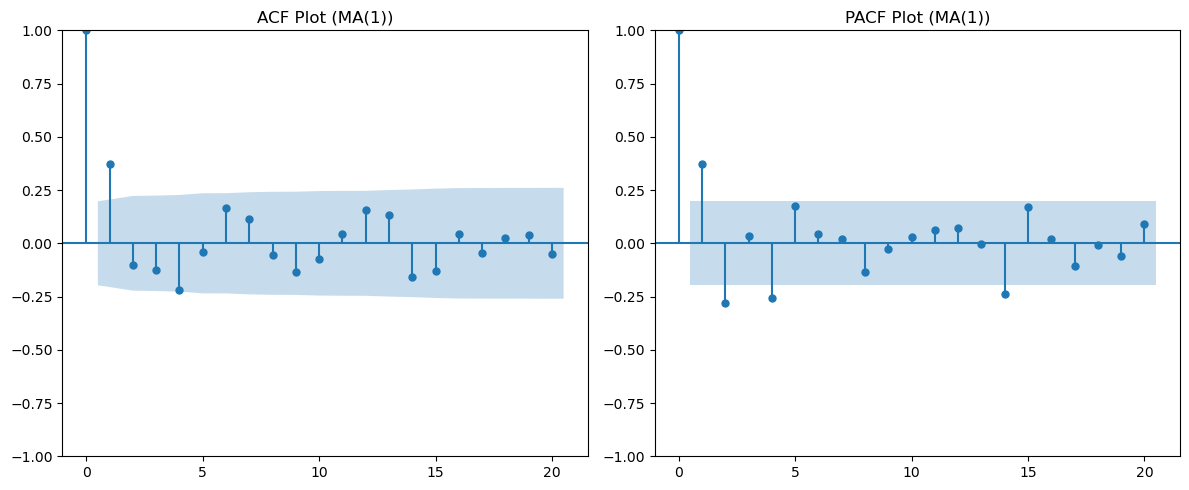

In [2]:
# Create MA(1) process
theta = 0.7
noise = np.random.normal(0, 1, n)
series_ma1 = noise[1:] + theta * noise[:-1]
series_ma1 = pd.Series(series_ma1)

# Plot ACF and PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(series_ma1, lags=20, ax=plt.gca())
plt.title("ACF Plot (MA(1))")

plt.subplot(1,2,2)
plot_pacf(series_ma1, lags=20, ax=plt.gca(), method='ywm')
plt.title("PACF Plot (MA(1))")

plt.tight_layout()
plt.show()


### Observation

ACF → Spike at Lag 1, then cuts off → suggests MA term q = 1.

PACF → Gradual decay → typical for MA processes.